In [200]:
import cv2
import matplotlib.pyplot as plt
import random
import numpy as np
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split

In [251]:
image_path = "/home/norman/Desktop/driving_dataset/1000.jpg"

In [252]:
img = plt.imread(image_path)

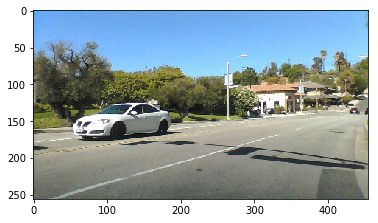

In [253]:
plt.imshow(img)
plt.show()

** Converto immagine in HSV (hue saturation value) per poter modificare facimente la luminosità**

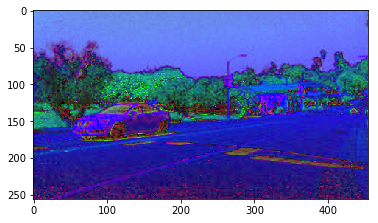

In [254]:
hsv = cv2.cvtColor(img, cv2.COLOR_RGB2HSV)
plt.imshow(hsv)
plt.show()

Modifico la luminosità moltiplicando il terzo canale di value
https://stackoverflow.com/questions/32609098/how-to-fast-change-image-brightness-with-python-opencv

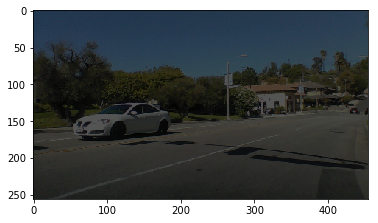

In [259]:
rand = random.uniform(0.3,1.6)
hsv[:,:,2] = rand*hsv[:,:,2]
new_img = cv2.cvtColor(hsv, cv2.COLOR_HSV2RGB)
plt.imshow(new_img)
plt.show()

Taglio via parti del cielo che non ci interessano
https://stackoverflow.com/questions/15589517/how-to-crop-an-image-in-opencv-using-python

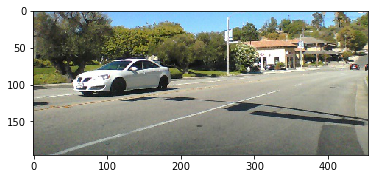

In [261]:
crop_img = img[60::, ::]
plt.imshow(crop_img)
plt.show()

Scrivo le funzioni di sopra come effettive funzioni

In [262]:
def change_bright(img):
    hsv = cv2.cvtColor(img, cv2.COLOR_RGB2HSV)
    
    rand = random.uniform(0.5,1.)
    hsv[:,:,2] = rand*hsv[:,:,2]
    new_img = cv2.cvtColor(hsv, cv2.COLOR_HSV2RGB)
   # plt.imshow(new_img)
   # plt.show()
    return new_img

In [263]:
change_bright(img)

array([[[ 61, 123, 186],
        [ 62, 123, 184],
        [ 67, 136, 188],
        ..., 
        [ 98, 146, 167],
        [ 96, 139, 164],
        [ 95, 134, 168]],

       [[ 58, 121, 184],
        [ 69, 134, 192],
        [ 67, 136, 188],
        ..., 
        [103, 152, 176],
        [ 92, 137, 167],
        [ 94, 140, 175]],

       [[ 63, 124, 186],
        [ 70, 130, 191],
        [ 69, 133, 188],
        ..., 
        [105, 152, 188],
        [ 89, 136, 172],
        [ 92, 142, 180]],

       ..., 
       [[ 68,  74,  68],
        [ 74,  78,  73],
        [ 76,  78,  77],
        ..., 
        [102, 105,  93],
        [100, 106,  91],
        [102, 108,  94]],

       [[ 65,  76,  77],
        [ 67,  77,  75],
        [ 70,  78,  72],
        ..., 
        [100, 103,  92],
        [ 98, 103,  92],
        [102, 107,  94]],

       [[ 66,  77,  83],
        [ 67,  78,  78],
        [ 71,  79,  73],
        ..., 
        [ 97,  99,  92],
        [ 97, 102,  92],
        [101, 106,

In [265]:
def crop_sky(img):
    #120*320
    #200*480 sulle reali
    crop_img = img[60::, ::]
   # plt.imshow(crop_img)
   # plt.show()
    return crop_img


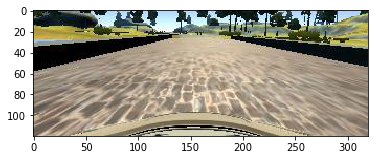

120

In [139]:
crop_sky(img)

## Per il dataset carico come X i path delle immagini e come y gli angoli di steering.


In [143]:
data_path="/home/norman/Desktop/driving_log.csv"

Retrieve paths of images

In [154]:
img_paths=[]
steers=[]
with open(data_path) as file:
    for line in file:
        if line.split(',')[0] == "center": continue
        img_paths.append("/home/norman/Desktop/" + line.split(',')[0])
        steers.append(line.split(',')[3])

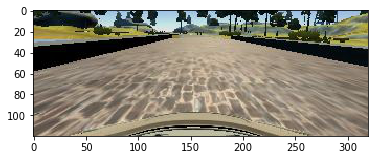

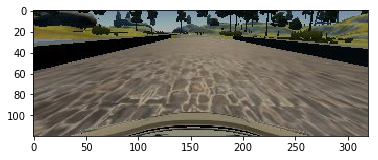

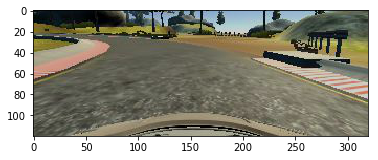

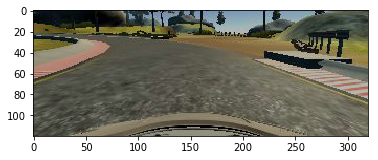

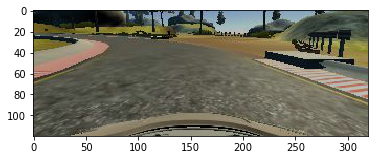

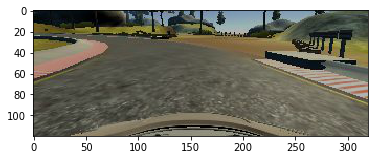

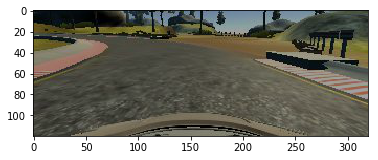

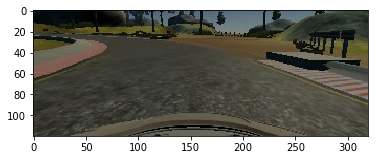

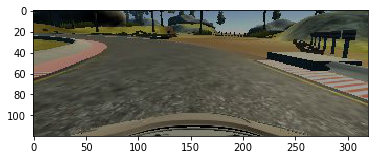

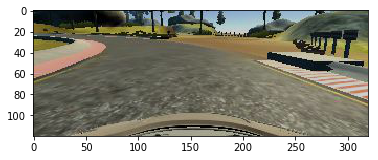

In [163]:
for i in range(10):
    img=plt.imread(img_paths[i])
    new=crop_sky(change_bright(img))
    plt.imshow(new)
    plt.show()

In [245]:
def gen_batch(batch_size):
    batch_x=np.zeros((batch_size,120,320,3))
    batch_y=np.zeros((batch_size,1))
    pointer=0
    (im_paths, steerss)=shuffle(img_paths, steers)
    while True:
        for i in range(batch_size):
            img=plt.imread(im_paths[pointer])
            steer=steerss[pointer]
            new_img=crop_sky(change_bright(img))
            
            batch_x[i]=new_img
            batch_y[i]=steer
            pointer+=1
            if pointer==len(im_paths)-1: pointer=0
        
        yield batch_x, batch_y

In [213]:
b_x=generator(5)

In [ ]:
for batch in b_x:
    for new_img in batch[0]:
        plt.imshow(new_img)


In [215]:
import matplotlib.image as mpimg
import numpy as np
import cv2
import pandas
import random
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Dense, Activation, Flatten, Dropout, Lambda, ELU
from keras.activations import relu, softmax
from keras.layers.convolutional import Convolution2D
from keras.layers.pooling import MaxPooling2D
from keras.optimizers import Adam
from keras.regularizers import l2
import math

Using TensorFlow backend.


In [246]:
generator=gen_batch(5)
input_shape = (120,320,3)
model = Sequential()
model.add(Lambda(lambda x: x/255 - 0.5, input_shape = input_shape))
model.add(Convolution2D(24, 5, 5, border_mode='valid', subsample =(2,2), W_regularizer = l2(0.001)))
model.add(Activation('relu'))
model.add(Convolution2D(36, 5, 5, border_mode='valid', subsample =(2,2), W_regularizer = l2(0.001)))
model.add(Activation('relu'))
model.add(Convolution2D(48, 5, 5, border_mode='valid', subsample = (2,2), W_regularizer = l2(0.001)))
model.add(Activation('relu'))
model.add(Convolution2D(64, 3, 3, border_mode='same', subsample = (2,2), W_regularizer = l2(0.001)))
model.add(Activation('relu'))
model.add(Convolution2D(64, 3, 3, border_mode='valid', subsample = (2,2), W_regularizer = l2(0.001)))
model.add(Activation('relu'))
model.add(Flatten())
model.add(Dense(80, W_regularizer = l2(0.001)))
model.add(Dropout(0.5))
model.add(Dense(40, W_regularizer = l2(0.001)))
model.add(Dropout(0.5))
model.add(Dense(16, W_regularizer = l2(0.001)))
model.add(Dropout(0.5))
model.add(Dense(10, W_regularizer = l2(0.001)))
model.add(Dense(1, W_regularizer = l2(0.001)))
adam = Adam(lr = 0.0001)
model.compile(optimizer= adam, loss='mse', metrics=['accuracy'])
model.summary()


/home/norman/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:5: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(24, (5, 5), strides=(2, 2), padding="valid", kernel_regularizer=<keras.reg...)`
  """
/home/norman/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:7: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(36, (5, 5), strides=(2, 2), padding="valid", kernel_regularizer=<keras.reg...)`
  import sys
/home/norman/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:9: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(48, (5, 5), strides=(2, 2), padding="valid", kernel_regularizer=<keras.reg...)`
  if __name__ == '__main__':
/home/norman/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:11: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(64, (3, 3), strides=(2, 2), padding="same", kernel_regularizer=<keras.reg...)`
  # This is added back by InteractiveShellApp.init_path()
/h

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lambda_10 (Lambda)           (None, 120, 320, 3)       0         
_________________________________________________________________
conv2d_46 (Conv2D)           (None, 58, 158, 24)       1824      
_________________________________________________________________
activation_46 (Activation)   (None, 58, 158, 24)       0         
_________________________________________________________________
conv2d_47 (Conv2D)           (None, 27, 77, 36)        21636     
_________________________________________________________________
activation_47 (Activation)   (None, 27, 77, 36)        0         
_________________________________________________________________
conv2d_48 (Conv2D)           (None, 12, 37, 48)        43248     
_________________________________________________________________
activation_48 (Activation)   (None, 12, 37, 48)        0         
__________

In [247]:
model.fit_generator(generator, samples_per_epoch = int(len(img_paths)/5-10), nb_epoch=3)

/home/norman/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: UserWarning: The semantics of the Keras 2 argument `steps_per_epoch` is not the same as the Keras 1 argument `samples_per_epoch`. `steps_per_epoch` is the number of batches to draw from the generator at each epoch. Basically steps_per_epoch = samples_per_epoch/batch_size. Similarly `nb_val_samples`->`validation_steps` and `val_samples`->`steps` arguments have changed. Update your method calls accordingly.
  """Entry point for launching an IPython kernel.
/home/norman/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: UserWarning: Update your `fit_generator` call to the Keras 2 API: `fit_generator(<generator..., steps_per_epoch=1597, epochs=3)`
  """Entry point for launching an IPython kernel.


Epoch 1/3
1597/1597 [==============================] - 258s - loss: 0.1832 - acc: 0.5425   
Epoch 2/3
1597/1597 [==============================] - 262s - loss: 0.0441 - acc: 0.5429   
Epoch 3/3
1597/1597 [==============================] - 261s - loss: 0.0252 - acc: 0.5424   
